<a href="https://colab.research.google.com/github/Bmartins25/Redes_Neurais_Modelos/blob/main/Bruno_alexnet__CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(f'X train shape: {x_train.shape}')
print(f'X test shape: {x_test.shape}')

print(f'Y train shape: {y_train.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (50000, 32, 32, 3)
X test shape: (10000, 32, 32, 3)
Y train shape: (50000, 1)
Y test shape: (10000, 1)


In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, Activation
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

D:\Anaconda\envs\deep_tf\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


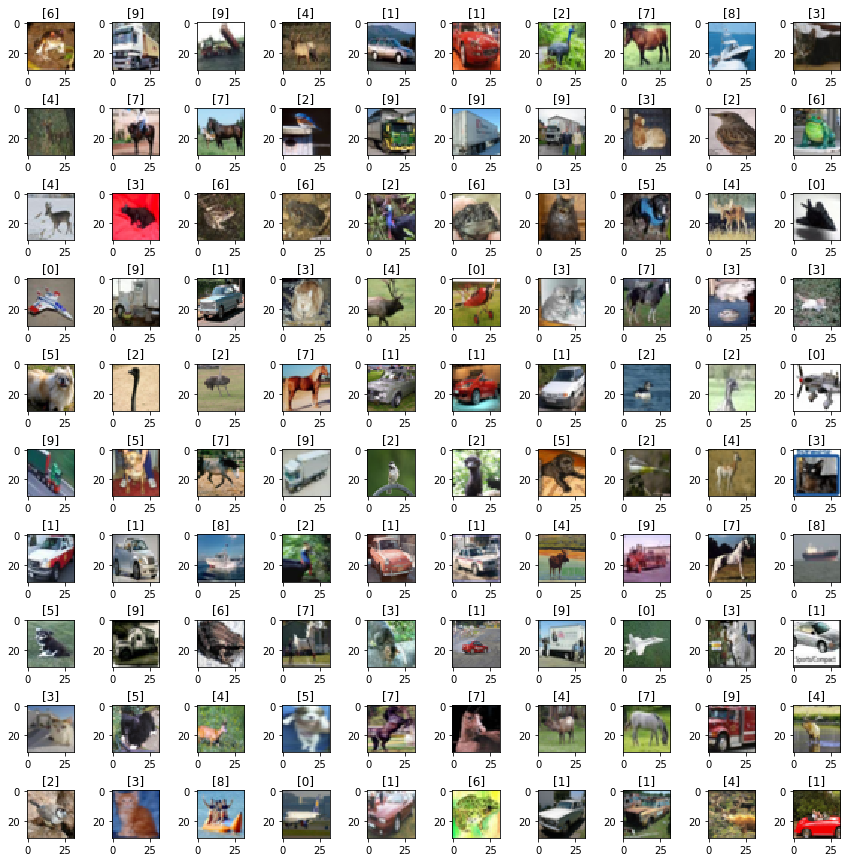

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize = (15,15))
ax = ax.ravel()

for i in range(0, 100):
    ax[i].imshow(x_train[i])
    ax[i].set_title(y_train[i])

plt.subplots_adjust(hspace=0.8)

In [ ]:
num_of_classes = 10

y_train = to_categorical(y_train, num_of_classes)
y_test = to_categorical(y_test, num_of_classes)

In [ ]:
l2_reg = 0

model = Sequential()

#1 CPR
model.add(Conv2D(96, (11,11), input_shape = x_train.shape[1:], padding='same', kernel_regularizer=l2(l2_reg)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#2 CPR

model.add(Conv2D(256, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#3 CPR
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#4 CPR
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

#5 CPR
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

# 1 FC

model.add(Dense(3072))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 2 FC

model.add(Dense(4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 3 FC

model.add(Dense(num_of_classes, activation='softmax'))
model.add(BatchNormalization())
model.add(Activation('softmax'))

print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer = Adadelta(), metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 256)       1024      
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 256)       0         
__________

In [ ]:
batch_size = 35
epochs = 25

history = model.fit(x=x_train, y=y_train, epochs = epochs, batch_size=batch_size,verbose=1, validation_data=(x_test, y_test), shuffle = True)

score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 318s 6ms/step - loss: 2.2617 - acc: 0.1570 - val_loss: 2.2449 - val_acc: 0.1959
Epoch 2/25
50000/50000 [==============================] - 321s 6ms/step - loss: 1.8910 - acc: 0.3416 - val_loss: 1.7883 - val_acc: 0.3828
Epoch 3/25
50000/50000 [==============================] - 333s 7ms/step - loss: 1.6037 - acc: 0.4560 - val_loss: 1.7745 - val_acc: 0.4024
Epoch 4/25
50000/50000 [==============================] - 320s 6ms/step - loss: 1.4261 - acc: 0.5150 - val_loss: 1.6249 - val_acc: 0.4497
Epoch 5/25
50000/50000 [==============================] - 318s 6ms/step - loss: 1.3476 - acc: 0.5536 - val_loss: 1.3708 - val_acc: 0.5526
Epoch 6/25
50000/50000 [==============================] - 319s 6ms/step - loss: 1.1850 - acc: 0.6127 - val_loss: 1.1642 - val_acc: 0.6222
Epoch 7/25
50000/50000 [==============================] - 321s 6ms/step - loss: 1.0644 - acc: 0.6559 - val_loss: 1.2427 - 

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<class 'range'>


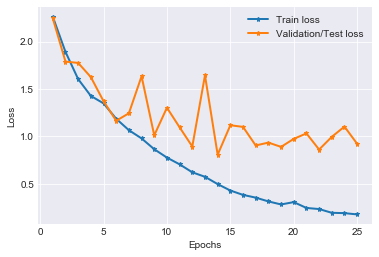

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs_as_list = range(1, len(loss_values) +1)

print(type(epochs_as_list))

plt.style.use('seaborn-darkgrid')

train_loss_line = plt.plot(epochs_as_list, loss_values, label = 'Train loss' )
test_loss_line = plt.plot(epochs_as_list, val_loss_values, label = 'Validation/Test loss' )

plt.setp(train_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)
plt.setp(test_loss_line, linewidth = 2.0, marker ='*', markersize = 5.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

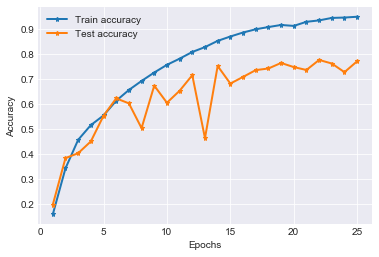

In [ ]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

train_acc_line = plt.plot(epochs_as_list, acc_values, label='Train accuracy')
test_acc_line = plt.plot(epochs_as_list, val_acc_values, label='Test accuracy')

plt.setp(train_acc_line, linewidth = 2.0, marker = '*', markersize =5.0)
plt.setp(test_acc_line, linewidth=2.0, marker= '*', markersize = 5.0)


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.88      0.89      0.89      1000
           2       0.71      0.66      0.68      1000
           3       0.61      0.59      0.60      1000
           4       0.74      0.76      0.75      1000
           5       0.64      0.72      0.68      1000
           6       0.79      0.88      0.83      1000
           7       0.90      0.76      0.83      1000
           8       0.82      0.87      0.85      1000
           9       0.92      0.77      0.84      1000

   micro avg       0.77      0.77      0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



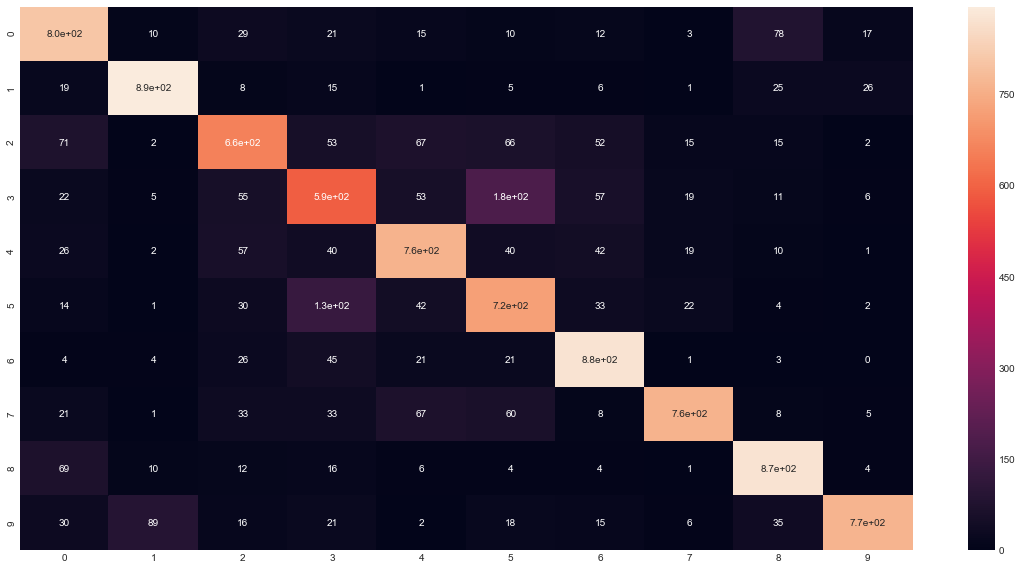

In [ ]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # np.argmax because our labels were one hot encoded
plt.figure(figsize = (20,10))
sns.heatmap(cm, annot=True)